In [272]:
from sklearn.datasets import load_boston
import pandas as pd


### Загрузим dataset

In [322]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Поссмотрим описание нашего dataset-а

In [324]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [325]:
data.shape

(506, 14)

### Ниже переведенные колонки (признаки) (google translate =) )

- CRIM - уровень преступности на душу населения по городам
- ZN - доля земли под жилую застройку, зонированная под участки площадью более 25 000 кв. футов.
- INDUS - доля акров, не относящихся к розничной торговле, на город
- CHAS -Фиктивная переменная Charles River (= 1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота (частей на 10 миллионов)
- RM - среднее количество комнат в доме
- AGE- доля жилых единиц, построенных до 1940 г.
- DIS - взвешенные расстояния до пяти Бостонских центров занятости
- RAD - индекс доступности радиальных магистралей
- TAX - полная ставка налога на имущество за 10 000 долларов США
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам
- LSTAT - % более низкий статус населения
- MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов

### На первый взгляд выделим признаки, которые кажуться определяющими нашу метку MEDV

- CRIM
- ZN
- RM
- AGE
- TAX
- PTRATIO
- B
- LSTAT

### Удалим ненужные столбцы.

In [326]:
data.drop(['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD'], axis=1, inplace=True)
data.head(5)

,CRIM,ZN,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,6.575,65.2,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,78.9,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,61.1,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,45.8,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,54.2,222,18.7,396.90,5.33,36.2


### Построив гистрограмму по признаку CRIM мы видим что уровень преступности на душу населения > 25 скорее всего выброс. Попробуем отсечь данные где CRIM > 25

<AxesSubplot:>

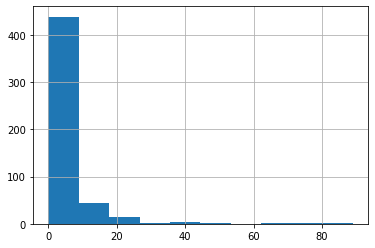

In [332]:
data.loc[:, 'CRIM'].hist()

In [337]:
data = data[data.loc[:, 'CRIM'] < 25]
data.head(5)

,CRIM,ZN,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,6.575,65.2,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,78.9,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,61.1,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,45.8,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,54.2,222,18.7,396.90,5.33,36.2


### Взглянув на признак ZN - мы видим что есть значения с 0. На основе этих данных можем создать новый признак. ZN_new где 0 будет участок < 25000, 1 > 25000

In [338]:
data['ZN_new'] = data['ZN'] != 0
data['ZN_new'] = data['ZN_new'].astype(int)

In [339]:
data.head(5)

,CRIM,ZN,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV,ZN_new
0,0.00632,18.0,6.575,65.2,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,6.421,78.9,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.185,61.1,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,6.998,45.8,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,7.147,54.2,222,18.7,396.90,5.33,36.2,0


### Теперь в нашу обучающую выборку возьмем признак ZN_new вместо ZN. 

In [340]:
data.drop(['ZN'], axis=1, inplace=True)
data.head(5)

,CRIM,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV,ZN_new
0,0.00632,6.575,65.2,296,15.3,396.90,4.98,24.0,1
1,0.02731,6.421,78.9,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.185,61.1,242,17.8,392.83,4.03,34.7,0
3,0.03237,6.998,45.8,222,18.7,394.63,2.94,33.4,0
4,0.06905,7.147,54.2,222,18.7,396.90,5.33,36.2,0


In [343]:
data.loc[:, 'ZN_new'].value_counts()

0    361
1    134
Name: ZN_new, dtype: int64

### Итого... у нас следующие признаки по которым будем угадывать метку.

- CRIM
- RM
- AGE
- TAX
- PTRATIO
- B
- LSTAT
- ZN_new

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = data[['CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'ZN_new']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Accuracy: {}'.format(reg.score(X, y)))

Weights: [ 1.44748520e-01  4.76208759e+00  1.57329525e-02 -3.06636576e-03
 -9.22944648e-01  1.20115041e-02 -5.76252157e-01 -6.90277230e-01]
Bias: 12.637789799327024
Error: 3.4622351670977496
Accuracy: 0.687809138241538


### Получили точность модели 0.68